In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt

In [3]:
# Load dataset
data = pd.read_csv('boston_housing_prices.csv')

X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
def build_enhanced_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))  # Input layer
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))  # Output layer with no activation function
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_enhanced_model()

In [7]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 552.8286 - mae: 21.6586 - val_loss: 381.6749 - val_mae: 17.8785
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 344.7144 - mae: 16.4538 - val_loss: 205.3677 - val_mae: 12.6310
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 200.5272 - mae: 11.5779 - val_loss: 82.0393 - val_mae: 7.1542
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 92.4559 - mae: 7.3167 - val_loss: 39.0463 - val_mae: 4.4081
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.8540 - mae: 5.2807 - val_loss: 27.9686 - val_mae: 3.5224
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.7198 - mae: 4.6381 - val_loss: 25.8339 - val_mae: 3.3459
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.9816 - mae: 4.7010 - val_loss: 25.1263 - val_mae: 3.3334
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.1328 - mae: 4.1495 - val_loss: 26.1128 - val_mae: 3.4148
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━

In [8]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test data: {test_mae_score}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5361 - mae: 2.0908
Mean Absolute Error on test data: 2.2771875858306885


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


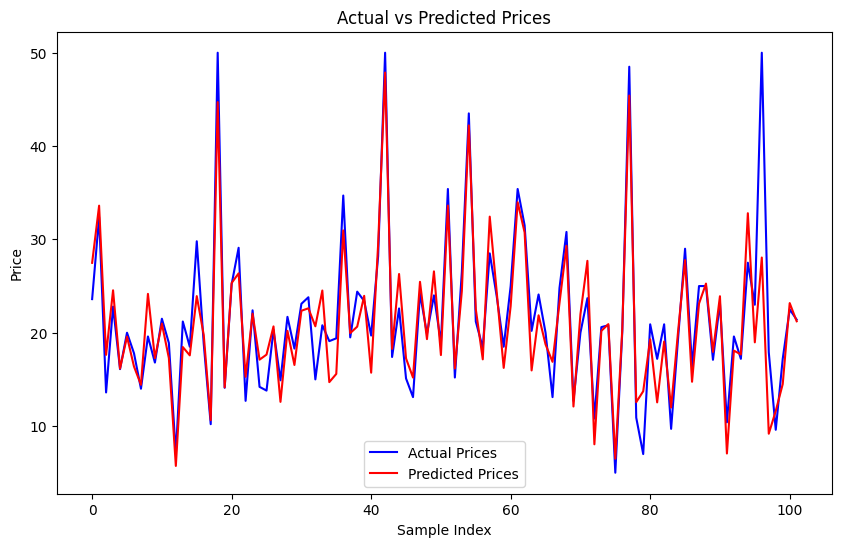

In [9]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()